# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Turn off local tensorflow CUDA warning
# from silence_tensorflow import silence_tensorflow
# silence_tensorflow()

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model and Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, accuracy_score                                     # Importing confusion_matrix to plot the confusion matrix and accuracy_score
from sklearn.preprocessing import LabelBinarizer                                                 # Importing LabelBinarizer
from tensorflow.keras.applications.vgg16 import VGG16                                            # Importing VGG16
# Display images using OpenCV
# from google.colab.patches import cv2_imshow                                                    # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Education/GreatLearning/Intro_to_CV/Project/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Education/GreatLearning/Intro_to_CV/Project/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
# Checking the shape of the images np array
print(f'There is', images.shape[0], f'rows and', images.shape[1], f'columns')

There is 4750 rows and 128 columns


In [7]:
# Checking the shape of the labels data
print(f'There is', labels.shape[0], f'rows and', labels.shape[1], f'columns')

There is 4750 rows and 1 columns


- *Rows match for label and image datasets.*

## Exploratory Data Analysis

### Plotting random images from each of the class

In [8]:
# function to create a random images
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

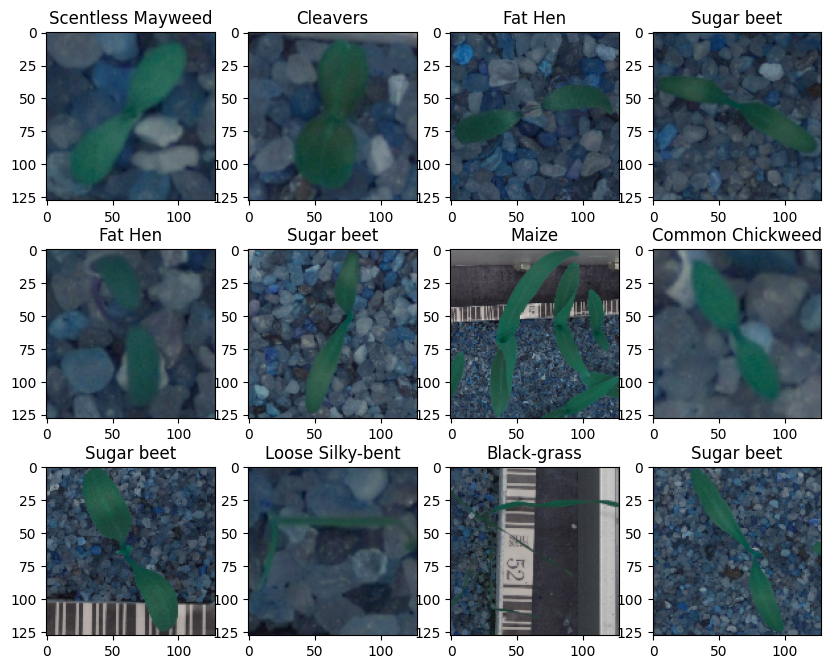

In [9]:
# lets plot some labeled images
plot_images(images,labels)

- *Some images are blurry, have poor sharpness, noisy background.*
- *The dataset has different zooming for each image of the species and swapped by OpenCV BRG channels.*

<b> Checking for data imbalance

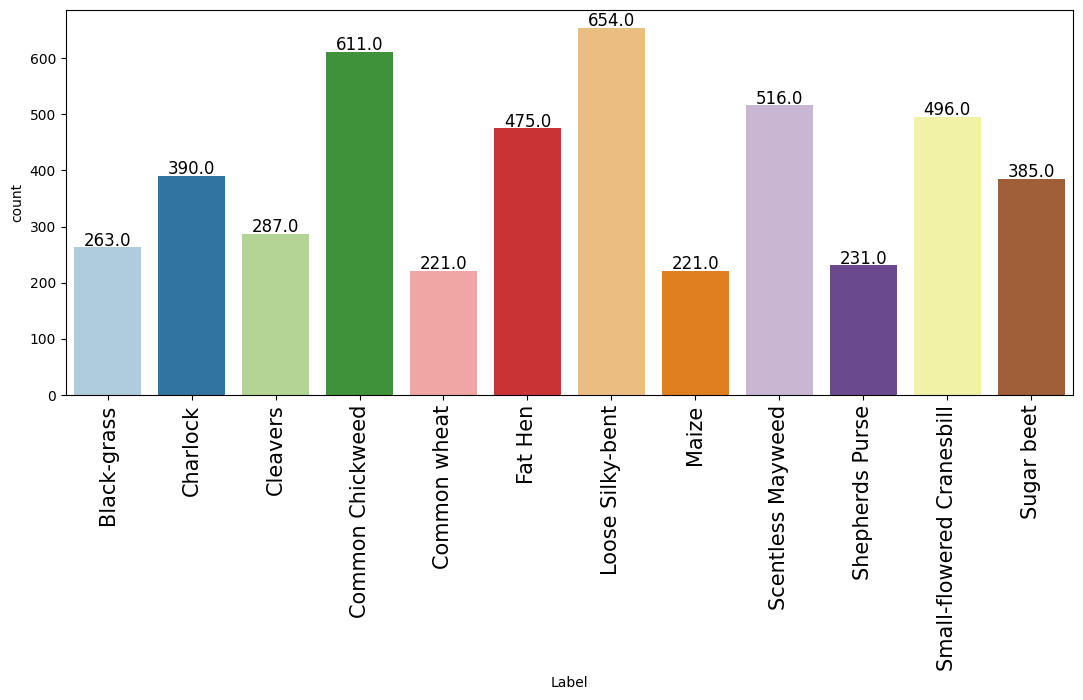

Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Maize                        0.046526
Common wheat                 0.046526
Name: proportion, dtype: float64

In [10]:
# Checking the distribution of species
labeled_barplot(labels, 'Label')
labels.value_counts(normalize=True)

- *The dataset is imbalanced.*
- *Loose Silky-bent has more labels, Maize and Common wheat have fewer labels*

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [11]:
# Converting the images from BGR to RGB using OpenCV COLOR_BGR2RGB function
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

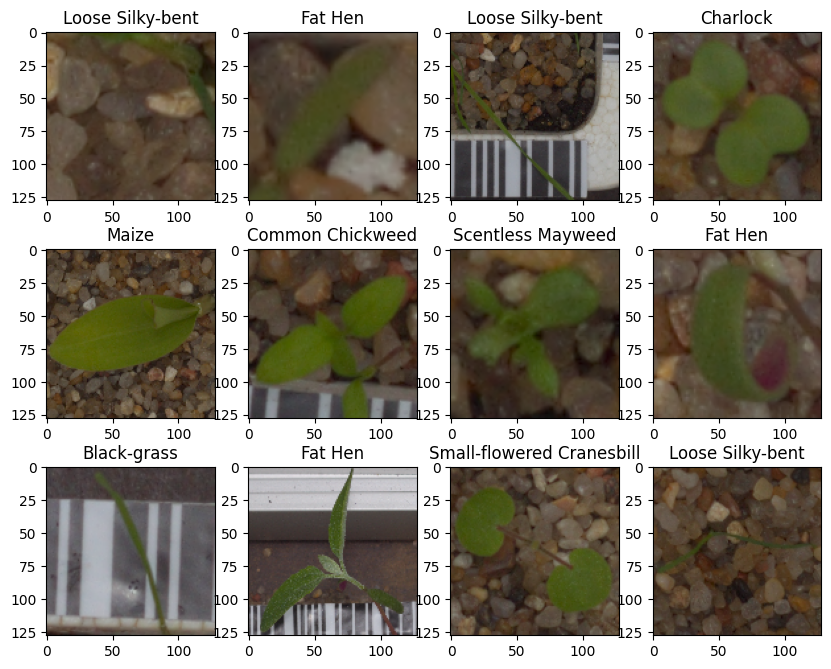

In [12]:
# let's check normalized RGB pictures:
plot_images(images,labels)

- *Currently, images look originally like human perception does.*

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
# let's resize the image dataset from 128 to 64 pxs
images_reduced = []
for i in range(len(images)):
  images_reduced.append(cv2.resize(images[i], (64, 64), interpolation=cv2.INTER_LINEAR))

In [14]:
# let's check reduced pictures by accessing the channel:
print(f'There is', images_reduced[0][0].shape)

There is (64, 3)


- *Reduced image elements have dimention 64x64 px.*

### Data Preparation for Modeling

**Split the dataset**

In [15]:
# let's split the dataset into three parts, train,test and validation using scikit-learn by 80/20
X, X_test, y, y_test = train_test_split(np.array(images_reduced), labels , test_size=0.2, random_state=1, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [16]:
# Checking the shape of split data
print(f'X_train has shape:', X_train.shape)
print(f'X_val has shape:', X_val.shape)
print(f'X_test has shape:', X_test.shape)
print(f'y_train has shape:', y_test.shape)
print(f'y_val has shape:', y_val.shape)
print(f'y_train has shape:', y_train.shape)

X_train has shape: (3040, 64, 64, 3)
X_val has shape: (760, 64, 64, 3)
X_test has shape: (950, 64, 64, 3)
y_train has shape: (950, 1)
y_val has shape: (760, 1)
y_train has shape: (3040, 1)


- *X_train, X_val, X_test data have the same 64x64x3(channels) dimentions.*
- *y_train, y_val, y_test data have the same number of column.*
- *The data split correctly.*

### Encode the target labels

- *Because labeled data has categorical values let's encode them:*

In [17]:
# let's encode the labels by scikit-learn LabelBinarizer class
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train) # let's use fit_transform to learn from y_train and to fill up this dataset
y_val_encoded = enc.transform(y_val)         # using learned data from train dataset
y_test_encoded = enc.transform(y_test)   # let's use fit_transform to learn from y_test to avoid the data leakage from train dataset

In [18]:
# Checking the shape of encoded data
print(f'y_train has shape:', y_test_encoded.shape)
print(f'y_val has shape:', y_val_encoded.shape)
print(f'y_train has shape:', y_train_encoded.shape)

y_train has shape: (950, 12)
y_val has shape: (760, 12)
y_train has shape: (3040, 12)


- *Encoded labeled data has the same number of column.*

### Data Normalization

- *Dividing all the pixel values by 255 to standardize all the images to have values between 0-1.*

In [19]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train/255.0
X_val_normalized = X_val/255.0
X_test_normalized = X_test/255.0

## Model Building

**Let's create some helper functions to reuse repetitive code:**

In [20]:
# let's use a function for clearing backend
def clear_backend()->None:
    #Clearing tf backend
    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

**Let's create a blank dataframe that will store the accuracy values for all the models we build:**

In [21]:
# creating the dataframes
metric_df = pd.DataFrame(columns=["accuracy on test"])

**Model 1:**

- *Let's use the simple CNN architecture:*
- *Conv2D(64, (3, 3)->MaxPooling2D((2, 2)->Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->(Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->Flatten()->Dense(100)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [22]:
# Intializing a sequential model

#clearing backend
clear_backend()

#initializing the model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [23]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
95/95 - 10s - loss: 2.4185 - accuracy: 0.1464 - val_loss: 2.3261 - val_accuracy: 0.2145 - 10s/epoch - 108ms/step
Epoch 2/30
95/95 - 1s - loss: 1.9317 - accuracy: 0.3352 - val_loss: 1.6036 - val_accuracy: 0.4039 - 1s/epoch - 14ms/step
Epoch 3/30
95/95 - 1s - loss: 1.4059 - accuracy: 0.4993 - val_loss: 1.3276 - val_accuracy: 0.5461 - 953ms/epoch - 10ms/step
Epoch 4/30
95/95 - 1s - loss: 1.1412 - accuracy: 0.6082 - val_loss: 1.0732 - val_accuracy: 0.6171 - 859ms/epoch - 9ms/step
Epoch 5/30
95/95 - 1s - loss: 0.9814 - accuracy: 0.6694 - val_loss: 0.9792 - val_accuracy: 0.6605 - 809ms/epoch - 9ms/step
Epoch 6/30
95/95 - 1s - loss: 0.8348 - accuracy: 0.7188 - val_loss: 0.9074 - val_accuracy: 0.7000 - 1s/epoch - 13ms/step
Epoch 7/30
95/95 - 1s - loss: 0.7415 - accuracy: 0.7408 - val_loss: 0.9323 - val_accuracy: 0.6974 - 877ms/epoch - 9ms/step
Epoch 8/30
95/95 - 1s - loss: 0.6429 - accuracy: 0.7812 - val_loss: 0.8652 - val_accuracy: 0.7289 - 865ms/epoch - 9ms/step
Epoch 9/30
95/95 -

**Model Evaluation**

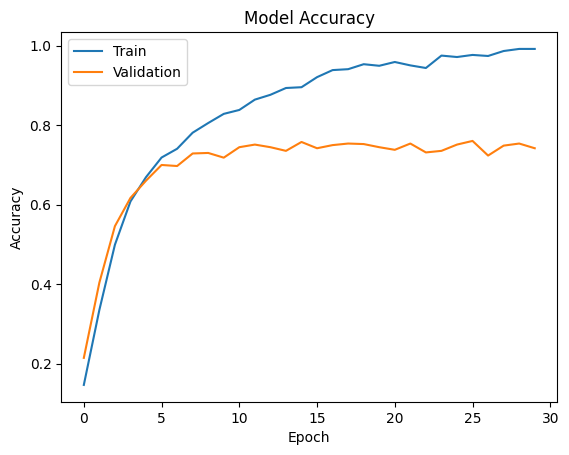

In [24]:
# let's plot accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *The validation shows some overfitting on trainig set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [25]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # accuracy evaluation

30/30 - 0s - loss: 1.6050 - accuracy: 0.7358 - 294ms/epoch - 10ms/step


**Plotting the Confusion Matrix**

In [26]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_1.predict(X_test_normalized)

30/30 [==============================] - 0s 2ms/step


**Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy. argmax() function which returns indices of the max element of the array in a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix:**

In [27]:
# Obtaining the categorical values from y_test_encoded
y_test_arg = np.argmax(y_test_encoded, axis=1)

In [28]:
# Obtaining the categorical values from y_pred_encoded
y_pred_arg = np.argmax(y_pred, axis=1)

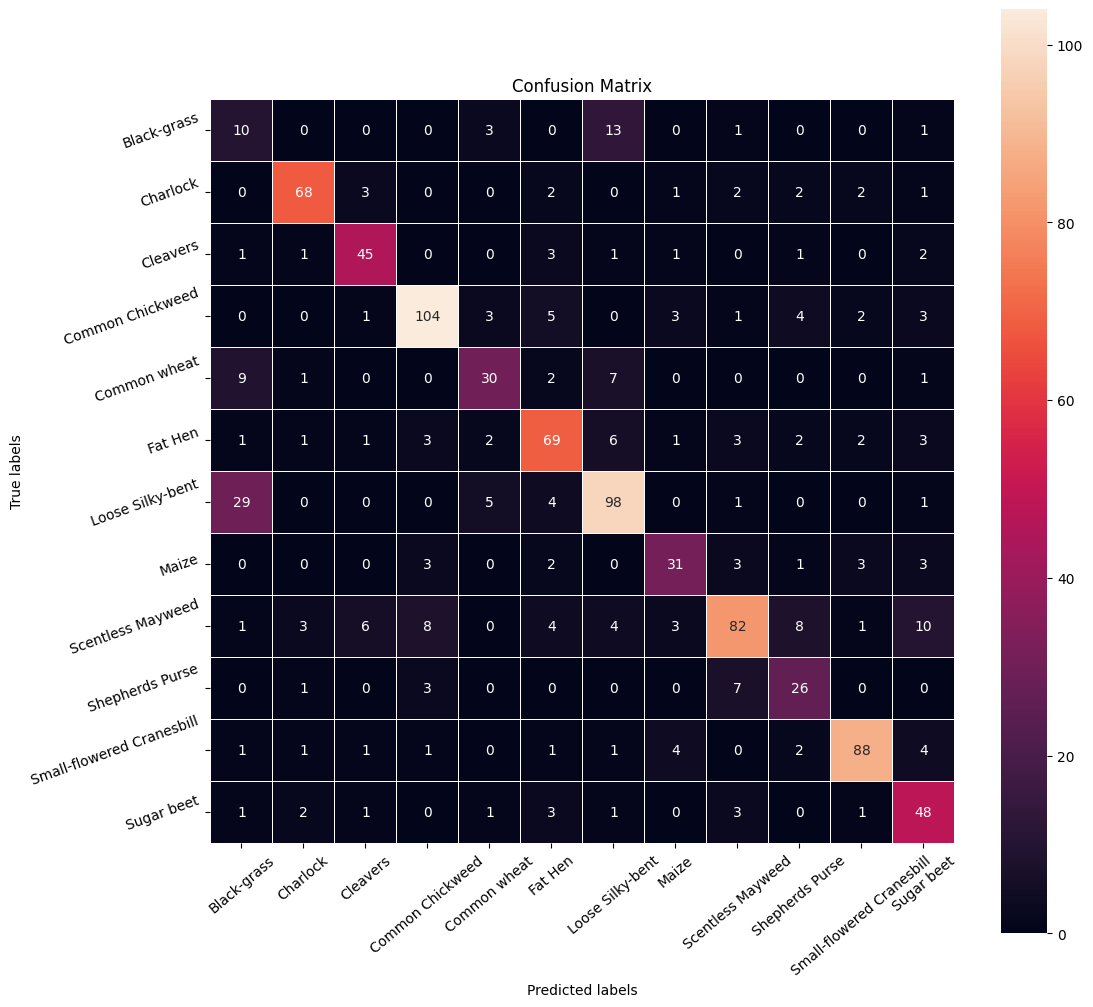

In [29]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *Black-grass & Loose Silky-bent labels have more wrong classifications.*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [30]:
# naming model in the metric dataframe
model_name = "Model_1:Plain"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [31]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.735789
Name: Model_1:Plain, dtype: float64

## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

**Model 2:**

### Reducing the learning rate:

- *Let's use the same CNN architecture:*
- *Conv2D(64, (3, 3)->MaxPooling2D((2, 2)->Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->(Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->Flatten()->Dense(100)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [32]:
# Intializing a sequential model

#clearing backend
clear_backend()

#initializing the model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(100, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [33]:
# Adding ReduceLROnPlateau callback function
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)


In [34]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_2 = model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            callbacks=[reduce_lr]
)

Epoch 1/30
95/95 - 3s - loss: 2.4185 - accuracy: 0.1408 - val_loss: 2.3125 - val_accuracy: 0.2355 - lr: 0.0010 - 3s/epoch - 30ms/step
Epoch 2/30
95/95 - 1s - loss: 1.9176 - accuracy: 0.3382 - val_loss: 1.6480 - val_accuracy: 0.3763 - lr: 0.0010 - 749ms/epoch - 8ms/step
Epoch 3/30
95/95 - 1s - loss: 1.4148 - accuracy: 0.5016 - val_loss: 1.3958 - val_accuracy: 0.5526 - lr: 0.0010 - 829ms/epoch - 9ms/step
Epoch 4/30
95/95 - 1s - loss: 1.1259 - accuracy: 0.6043 - val_loss: 1.0787 - val_accuracy: 0.6237 - lr: 0.0010 - 652ms/epoch - 7ms/step
Epoch 5/30
95/95 - 1s - loss: 0.9945 - accuracy: 0.6592 - val_loss: 1.0177 - val_accuracy: 0.6500 - lr: 0.0010 - 671ms/epoch - 7ms/step
Epoch 6/30
95/95 - 1s - loss: 0.8288 - accuracy: 0.7138 - val_loss: 0.9387 - val_accuracy: 0.6816 - lr: 0.0010 - 581ms/epoch - 6ms/step
Epoch 7/30
95/95 - 1s - loss: 0.7238 - accuracy: 0.7401 - val_loss: 0.9673 - val_accuracy: 0.6934 - lr: 0.0010 - 663ms/epoch - 7ms/step
Epoch 8/30
95/95 - 1s - loss: 0.6833 - accuracy: 0

**Model Evaluation**

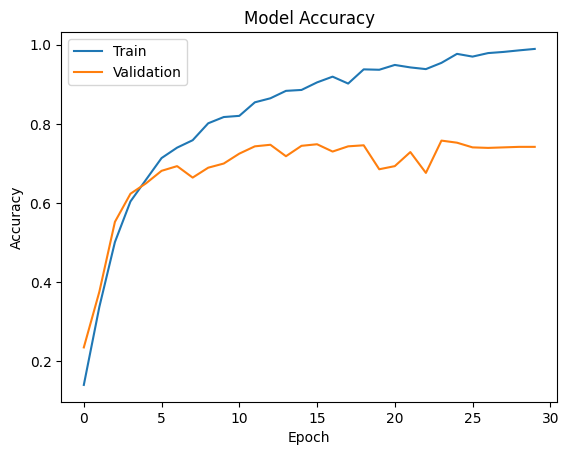

In [35]:
# let's plot accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *The validation still shows some overfitting on the training set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [36]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # accuracy evaluation

30/30 - 0s - loss: 1.5831 - accuracy: 0.7263 - 103ms/epoch - 3ms/step


**Plotting the Confusion Matrix**

In [37]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_2.predict(X_test_normalized)

30/30 [==============================] - 0s 3ms/step


In [38]:
# Obtaining the categorical values from y_encodeds
y_pred_arg = np.argmax(y_pred, axis=1)

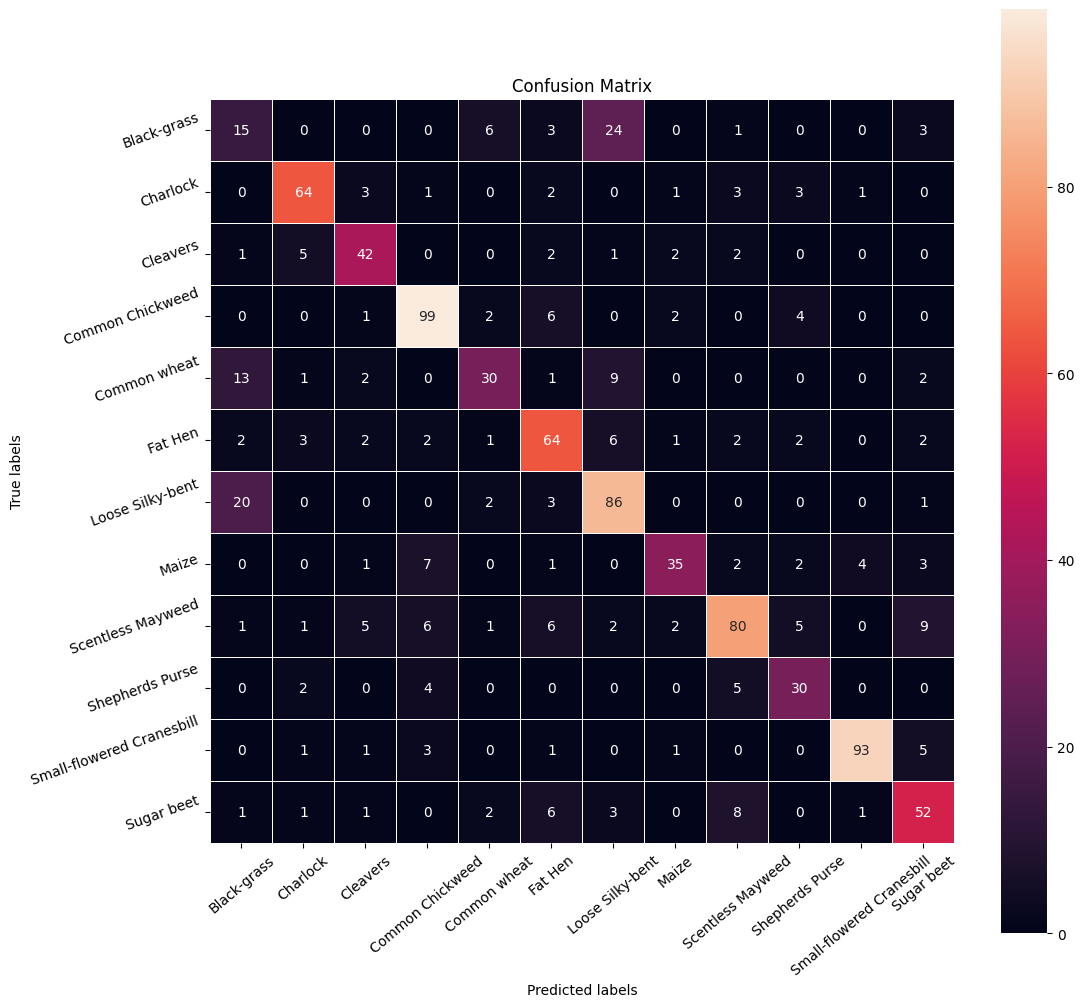

In [39]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *Black-grass and Loose Silky-bent still have misclassification, the models classify these two species interchangeably.*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [40]:
# naming model in the metric dataframe
model_name = "Model_2:Plain&ReduceLROnPlateau"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [41]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.726316
Name: Model_2:Plain&ReduceLROnPlateau, dtype: float64

### Adding BatchNormalization and Dropout to reduce overfitting:

**Model 3:**

- *Let's use the same CNN architecture with adding BatchNormalization layers:*
- *Conv2D(64, (3, 3)->MaxPooling2D((2, 2)->BatchNormalization()->Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->BatchNormalization()->(Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->Flatten()->Dense(100)->Dropout(0.25)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [42]:
# Intializing a sequential model

#clearing backend
clear_backend()

#initializing the model
model_3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
# Adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D((2, 2), padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_3.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())
# Adding a fully connected dense layer with 100 neurons
model_3.add(Dense(100, activation='relu'))
model_3.add(Dropout(0.25))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_3.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

<b> Fitting the model on the train data

In [43]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_3 = model_3.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            callbacks=[reduce_lr]
)

Epoch 1/30
95/95 - 4s - loss: 2.1819 - accuracy: 0.2651 - val_loss: 2.4858 - val_accuracy: 0.1382 - lr: 0.0010 - 4s/epoch - 43ms/step
Epoch 2/30
95/95 - 1s - loss: 1.5354 - accuracy: 0.4711 - val_loss: 2.8143 - val_accuracy: 0.1382 - lr: 0.0010 - 860ms/epoch - 9ms/step
Epoch 3/30
95/95 - 1s - loss: 1.2051 - accuracy: 0.5681 - val_loss: 4.0590 - val_accuracy: 0.1382 - lr: 0.0010 - 851ms/epoch - 9ms/step
Epoch 4/30
95/95 - 1s - loss: 1.0136 - accuracy: 0.6487 - val_loss: 3.8228 - val_accuracy: 0.1855 - lr: 0.0010 - 838ms/epoch - 9ms/step
Epoch 5/30
95/95 - 1s - loss: 0.8594 - accuracy: 0.6905 - val_loss: 3.7316 - val_accuracy: 0.2000 - lr: 0.0010 - 733ms/epoch - 8ms/step
Epoch 6/30
95/95 - 1s - loss: 0.7882 - accuracy: 0.7181 - val_loss: 1.3960 - val_accuracy: 0.5461 - lr: 0.0010 - 648ms/epoch - 7ms/step
Epoch 7/30
95/95 - 1s - loss: 0.6929 - accuracy: 0.7513 - val_loss: 1.3043 - val_accuracy: 0.5816 - lr: 0.0010 - 699ms/epoch - 7ms/step
Epoch 8/30
95/95 - 1s - loss: 0.6678 - accuracy: 0

**Model Evaluation**

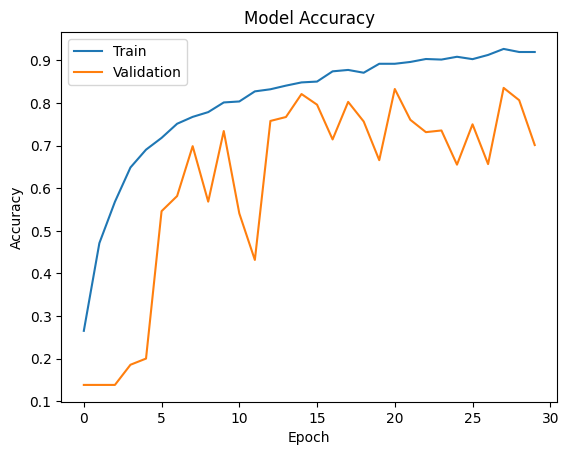

In [44]:
# let's plot accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *Model accuracy has become noisy in the validation set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [45]:
accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)   # accuracy evaluation

30/30 - 0s - loss: 1.5393 - accuracy: 0.6905 - 130ms/epoch - 4ms/step


**Plotting the Confusion Matrix**

In [46]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_3.predict(X_test_normalized)

30/30 [==============================] - 0s 4ms/step


In [47]:
# Obtaining the categorical values from y_encodeds
y_pred_arg = np.argmax(y_pred, axis=1)

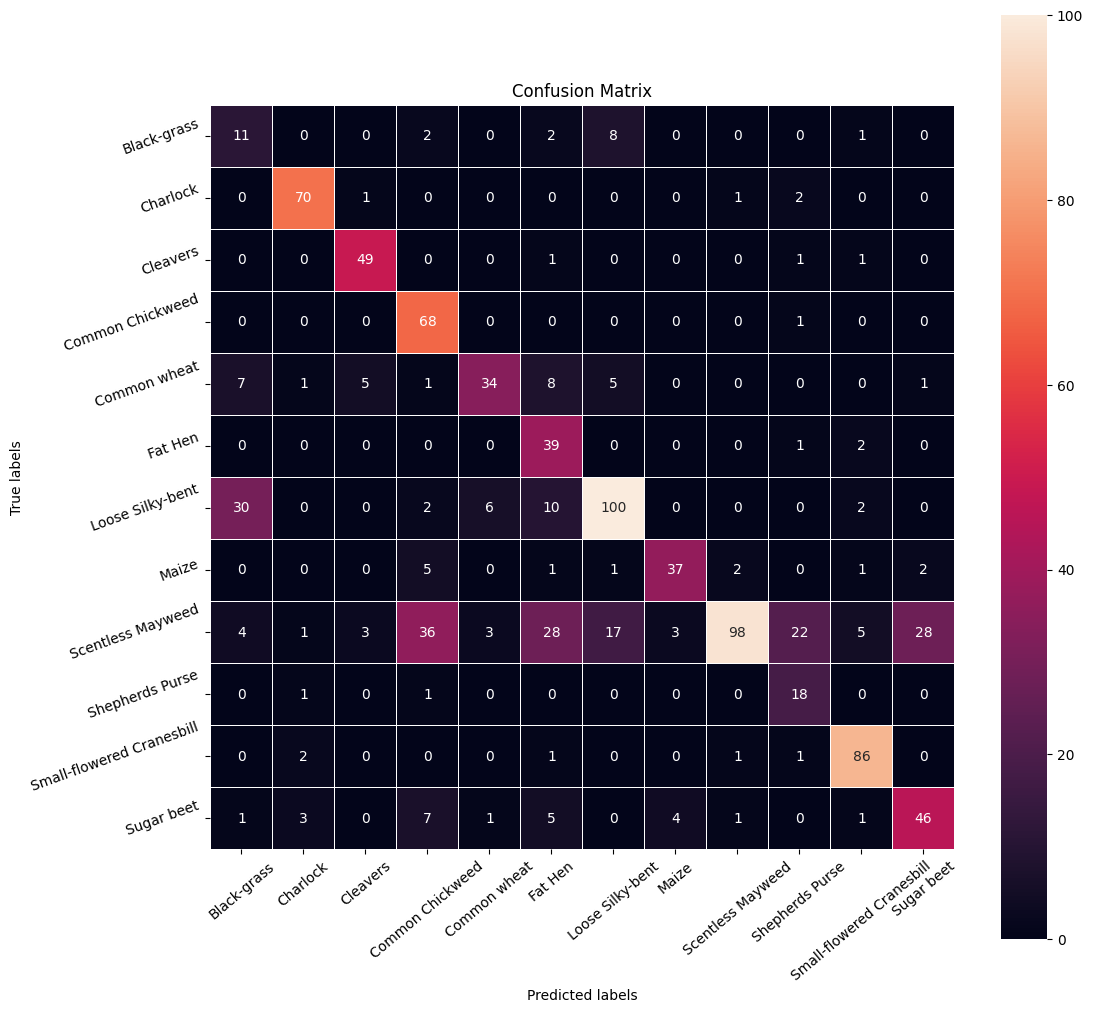

In [48]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *Like previously the model found it hard to differ two species - Black-grass and Loose Silky-Bent despite that accuracy has improved.*
- *This issue can be related to the wrong perception of Black grass and Loose Silki-Bent pictures by CNN, therefore let's perform some data augmentation to fix it.*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [49]:
# naming model in the metric dataframe
model_name = "Model_3:Batch&Dropout&ReduceLROnPlateau"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [50]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.690526
Name: Model_3:Batch&Dropout&ReduceLROnPlateau, dtype: float64

### **Data Augmentation**

**Let's perform data augmentation on the training set to improve a model performance by using ImageDataGenerator class**.

**Parameters of ImageDataGenerator:** <br>
**1. Horizontal Flip** - True <br>
**2. Vertical Flip** - False <br>
**3. Height Shift** - 0.1 <br>
**4. Width Shift** - 0.1 <br>
**5. Rotation** - 20 <br>
**6. Shear** - 0.1 <br>

In [51]:
# Create instance
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.1)

# Flowing training images in batches of 20 using train_datagen generator
batch_size = 20
train_generator = train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False)

### Reducing the learning rate with augmented data:

**Model 4:**

- *Let's use the same CNN architecture:*
- *Conv2D(64, (3, 3)->MaxPooling2D((2, 2)->Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->(Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->Flatten()->Dense(100)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [52]:
# Intializing a sequential model

#clearing backend
clear_backend()

#initializing the model
model_4 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_4.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
# Adding max pooling to reduce the size of output of first conv layer
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_4.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_4.add(Flatten())
# Adding a fully connected dense layer with 100 neurons
model_4.add(Dense(100, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_4.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [53]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_4 = model_4.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            callbacks=[reduce_lr]
)

Epoch 1/30
95/95 - 3s - loss: 2.4163 - accuracy: 0.1405 - val_loss: 2.3065 - val_accuracy: 0.2053 - lr: 0.0010 - 3s/epoch - 37ms/step
Epoch 2/30
95/95 - 1s - loss: 1.9201 - accuracy: 0.3303 - val_loss: 1.6678 - val_accuracy: 0.4039 - lr: 0.0010 - 595ms/epoch - 6ms/step
Epoch 3/30
95/95 - 1s - loss: 1.4265 - accuracy: 0.4987 - val_loss: 1.3648 - val_accuracy: 0.5566 - lr: 0.0010 - 654ms/epoch - 7ms/step
Epoch 4/30
95/95 - 1s - loss: 1.1666 - accuracy: 0.5845 - val_loss: 1.0931 - val_accuracy: 0.6316 - lr: 0.0010 - 590ms/epoch - 6ms/step
Epoch 5/30
95/95 - 1s - loss: 1.0386 - accuracy: 0.6470 - val_loss: 1.0450 - val_accuracy: 0.6421 - lr: 0.0010 - 575ms/epoch - 6ms/step
Epoch 6/30
95/95 - 1s - loss: 0.8690 - accuracy: 0.6964 - val_loss: 1.0006 - val_accuracy: 0.6711 - lr: 0.0010 - 653ms/epoch - 7ms/step
Epoch 7/30
95/95 - 1s - loss: 0.7801 - accuracy: 0.7201 - val_loss: 0.9754 - val_accuracy: 0.6868 - lr: 0.0010 - 656ms/epoch - 7ms/step
Epoch 8/30
95/95 - 1s - loss: 0.7256 - accuracy: 0

**Model Evaluation**

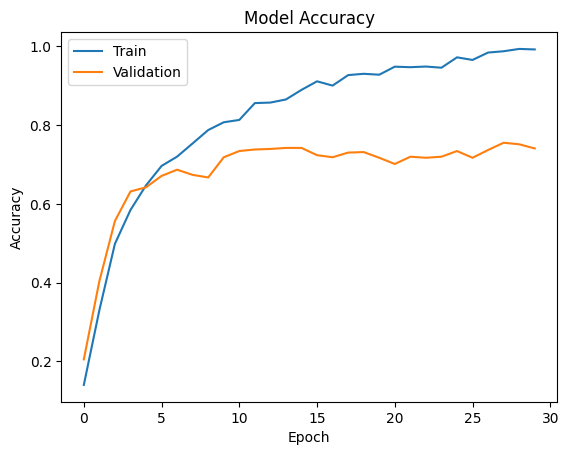

In [54]:
# let's plot accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *The validation shows some overfitting on the training set with some divergence between training and validation tests.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [55]:
accuracy = model_4.evaluate(X_test_normalized, y_test_encoded, verbose=2)   # accuracy evaluation

30/30 - 0s - loss: 1.5961 - accuracy: 0.7042 - 116ms/epoch - 4ms/step


**Plotting the Confusion Matrix**

In [56]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_4.predict(X_test_normalized)

30/30 [==============================] - 0s 3ms/step


In [57]:
# Obtaining the categorical values from y_encodeds
y_pred_arg = np.argmax(y_pred, axis=1)

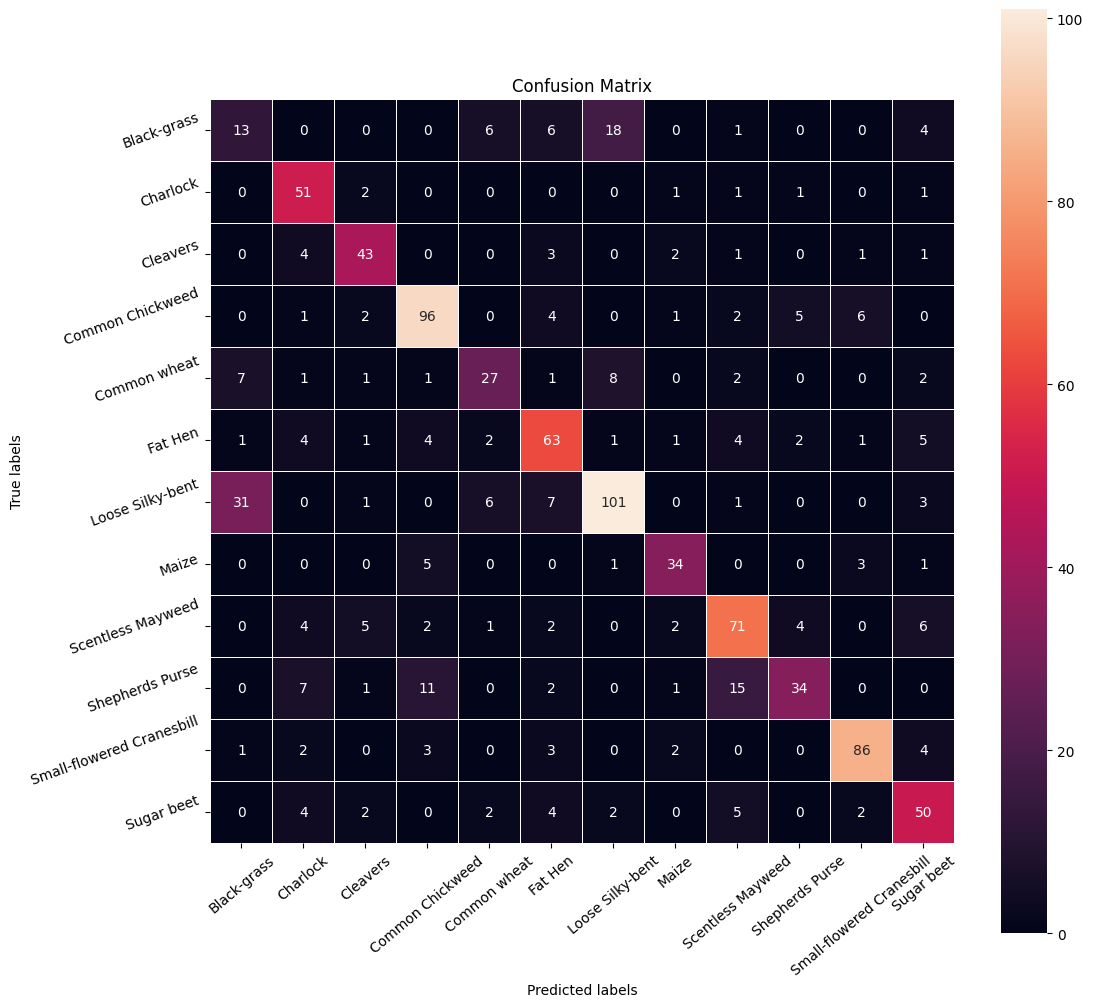

In [58]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *We still have the wrong Black-grass and Loose Silky classifications with the wrong Common wheat classification (it looks some Silky-bent pieces got wrongly classified as Common wheat after data augmentation).*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [59]:
# naming model in the metric dataframe
model_name = "Model_4:Plain&ReduceLROnPlateau&Augmented"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [60]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.704211
Name: Model_4:Plain&ReduceLROnPlateau&Augmented, dtype: float64

### Using a model with BatchNormalization and Dropout with augmented data:

**Model 5:**

- *Let's use the CNN architecture with adding BatchNormalization layers that gives best accuracy score:*
- *Conv2D(64, (3, 3)->MaxPooling2D((2, 2)->BatchNormalization()->Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->BatchNormalization()->(Conv2D(32, (3, 3)->(MaxPooling2D((2, 2)->Flatten()->Dense(100)->Dropout(0.25)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [61]:
# Intializing a sequential model

#clearing backend
clear_backend()

#initializing the model
model_5 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_5.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))
# Adding max pooling to reduce the size of output of first conv layer
model_5.add(MaxPooling2D((2, 2), padding = 'same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_5.add(MaxPooling2D((2, 2), padding = 'same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_5.add(MaxPooling2D((2, 2), padding = 'same'))
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_5.add(Flatten())
# Adding a fully connected dense layer with 100 neurons
model_5.add(Dense(100, activation='relu'))
model_5.add(Dropout(0.25))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_5.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

<b> Fitting the model on the train data

In [62]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_5 = model_5.fit(
            train_generator,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            callbacks=[reduce_lr]
)

Epoch 1/30
152/152 - 7s - loss: 2.0745 - accuracy: 0.2898 - val_loss: 3.0539 - val_accuracy: 0.1197 - lr: 0.0010 - 7s/epoch - 44ms/step
Epoch 2/30
152/152 - 4s - loss: 1.5158 - accuracy: 0.4806 - val_loss: 4.5667 - val_accuracy: 0.1355 - lr: 0.0010 - 4s/epoch - 25ms/step
Epoch 3/30
152/152 - 4s - loss: 1.3316 - accuracy: 0.5536 - val_loss: 2.5112 - val_accuracy: 0.2224 - lr: 0.0010 - 4s/epoch - 26ms/step
Epoch 4/30
152/152 - 5s - loss: 1.2198 - accuracy: 0.5780 - val_loss: 1.9344 - val_accuracy: 0.4329 - lr: 0.0010 - 5s/epoch - 36ms/step
Epoch 5/30
152/152 - 4s - loss: 1.1865 - accuracy: 0.5836 - val_loss: 1.0562 - val_accuracy: 0.6566 - lr: 0.0010 - 4s/epoch - 26ms/step
Epoch 6/30
152/152 - 6s - loss: 1.0665 - accuracy: 0.6303 - val_loss: 0.9058 - val_accuracy: 0.6882 - lr: 0.0010 - 6s/epoch - 36ms/step
Epoch 7/30
152/152 - 4s - loss: 1.0262 - accuracy: 0.6487 - val_loss: 0.9161 - val_accuracy: 0.6868 - lr: 0.0010 - 4s/epoch - 25ms/step
Epoch 8/30
152/152 - 4s - loss: 0.9444 - accurac

**Model Evaluation**

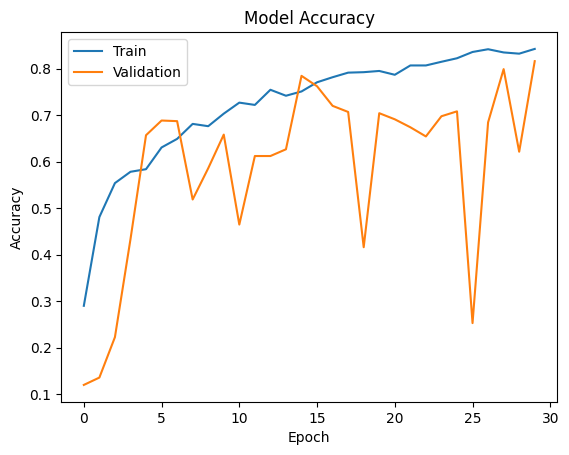

In [63]:
# let's plot accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *Model accuracy has become noisy in the validation set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [64]:
accuracy = model_5.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # accuracy evaluation

30/30 - 0s - loss: 0.5755 - accuracy: 0.8211 - 121ms/epoch - 4ms/step


**Plotting the Confusion Matrix**

In [65]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_5.predict(X_test_normalized)

30/30 [==============================] - 0s 3ms/step


In [66]:
# Obtaining the categorical values from y_encodeds
y_pred_arg = np.argmax(y_pred, axis=1)

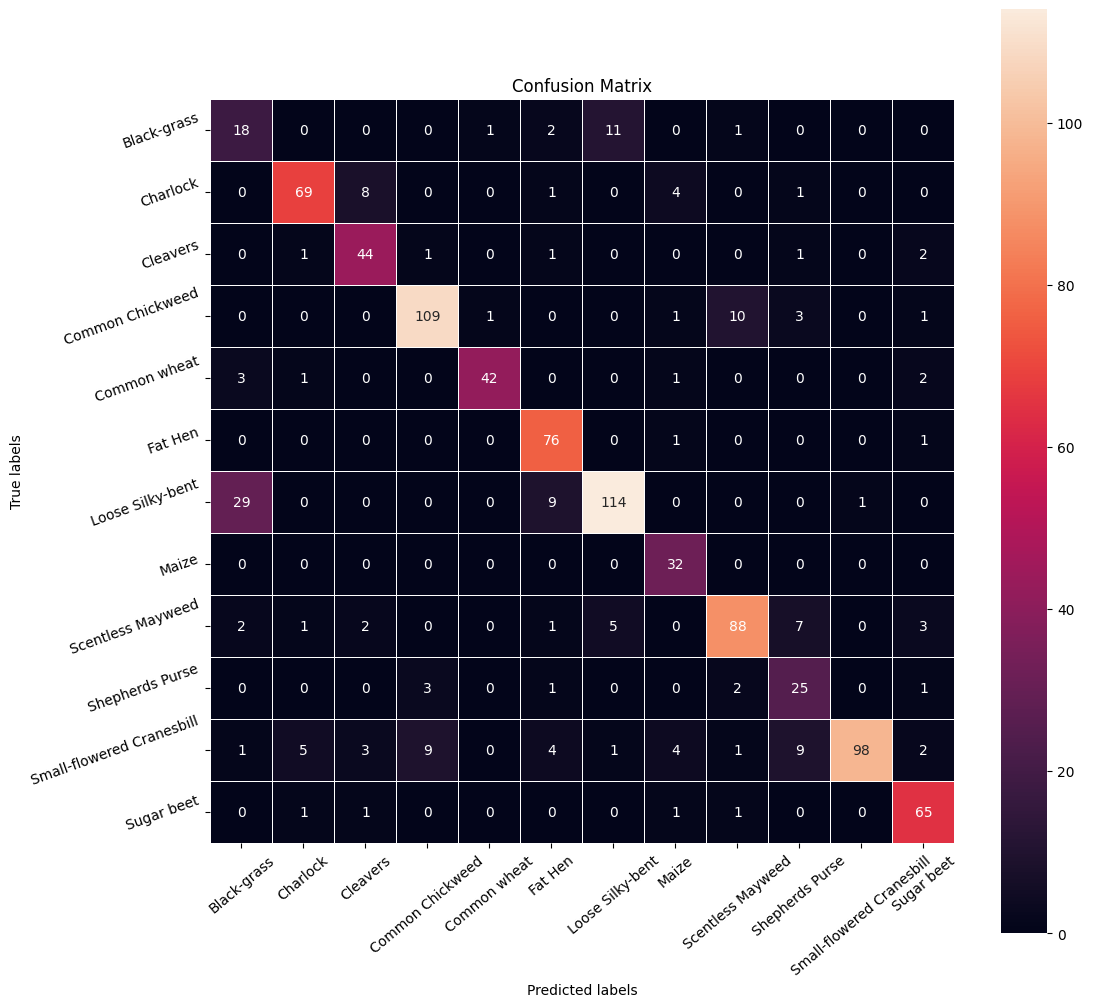

In [67]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *We still have the wrong Black-grass and Loose Silky classifications with the wrong Common wheat classification (it looks some Silky-bent pieces got wrongly classified as Common wheat after data augmentation).*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [68]:
# naming model in the metric dataframe
model_name = "Model_5:Batch&Dropout&ReduceLROnPlateau&Augmented"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [69]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.821053
Name: Model_5:Batch&Dropout&ReduceLROnPlateau&Augmented, dtype: float64

## **Using transfer learning technics to improve a model performance:**

#### **Model Building using Transfer Learning: VGG 16**

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset to try improving our model.
- Below is a schematic of the VGG16 model.
- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.

![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

**For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing VGG16 fully-connected layers without last dense-later with fully connected layers created specifically for our problem:**

In [70]:
# Summary of the whole model
model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

**Let't reuse last MaxPooling2d layer for using in our CNN:**

In [71]:
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

**Let't freeze VGG model making the layers non-trainable:**

In [72]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them and check
for layer in vgg_model.layers:
    layer.trainable = False
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


**Model 6:**

- *Let's use the simple CNN architecture for transfer learning:*
- *vgg_model->Flatten()->Dense(64, relu)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [73]:
#clearing backend
clear_backend()

# Intializing a sequential model
model_6 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_6.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_6.add(Flatten())

# Adding a fully connected dense layer with 64 neurons
model_6.add(Dense(64, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_6.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 12)                780       
                                                                 
Total params: 14846604 (56.64 MB)
Trainable params: 131916 (515.30 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


<b> Fitting the model on the train data

In [74]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_6 = model_6.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
95/95 - 6s - loss: 2.0853 - accuracy: 0.3066 - val_loss: 1.7961 - val_accuracy: 0.4342 - 6s/epoch - 61ms/step
Epoch 2/30
95/95 - 2s - loss: 1.6374 - accuracy: 0.4664 - val_loss: 1.5527 - val_accuracy: 0.4763 - 2s/epoch - 18ms/step
Epoch 3/30
95/95 - 2s - loss: 1.4344 - accuracy: 0.5270 - val_loss: 1.4377 - val_accuracy: 0.5145 - 2s/epoch - 18ms/step
Epoch 4/30
95/95 - 2s - loss: 1.2989 - accuracy: 0.5668 - val_loss: 1.3629 - val_accuracy: 0.5461 - 2s/epoch - 21ms/step
Epoch 5/30
95/95 - 2s - loss: 1.1964 - accuracy: 0.6089 - val_loss: 1.3143 - val_accuracy: 0.5434 - 2s/epoch - 21ms/step
Epoch 6/30
95/95 - 2s - loss: 1.1006 - accuracy: 0.6438 - val_loss: 1.2439 - val_accuracy: 0.5921 - 2s/epoch - 21ms/step
Epoch 7/30
95/95 - 3s - loss: 1.0331 - accuracy: 0.6645 - val_loss: 1.2741 - val_accuracy: 0.5237 - 3s/epoch - 28ms/step
Epoch 8/30
95/95 - 2s - loss: 0.9927 - accuracy: 0.6753 - val_loss: 1.2400 - val_accuracy: 0.5763 - 2s/epoch - 18ms/step
Epoch 9/30
95/95 - 2s - loss: 0.

**Model Evaluation**

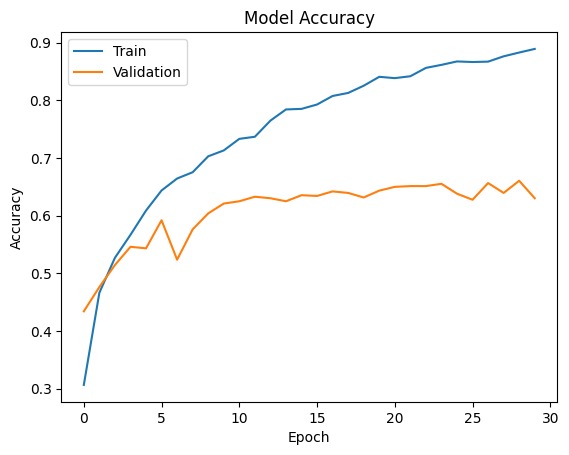

In [75]:
# let's plot accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *The validation shows some overfitting on trainig set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [76]:
accuracy = model_6.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # accuracy evaluation

30/30 - 1s - loss: 1.2942 - accuracy: 0.6147 - 1s/epoch - 41ms/step


**Plotting the Confusion Matrix**

In [77]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_6.predict(X_test_normalized)

30/30 [==============================] - 1s 13ms/step


In [78]:
# Obtaining the categorical values from y_pred_encoded
y_pred_arg = np.argmax(y_pred, axis=1)

In [79]:
# Obtaining the categorical values from y_test_encoded
y_test_arg = np.argmax(y_test_encoded, axis=1)

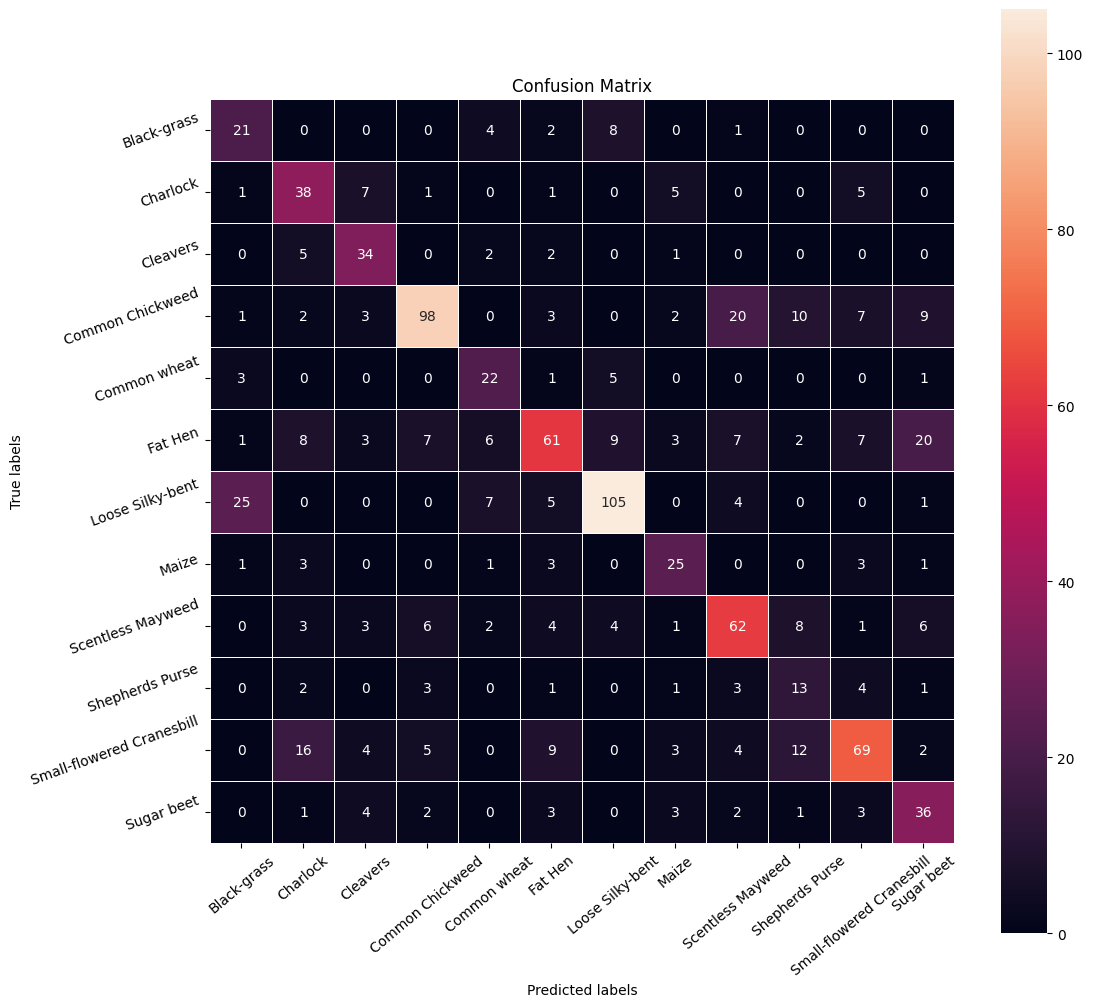

In [80]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *Black-grass & Loose Silky-bent, and Scentless Mayweed with Charlook labels have more misclassifications from pretrained VGG16 imageNet.*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [81]:
# naming model in the metric dataframe
model_name = "Model_6:Transfer&Learning"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [82]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.614737
Name: Model_6:Transfer&Learning, dtype: float64

### Improving transferred VGG16 model with augmented data:

**Model 7:**

- *Let's use the simple CNN architecture for transfer learning:*
- *vgg_model->Flatten()->Dense(64, relu)->Dense(12, softmax_output)*
- *Output has 12 categorical variables, therefore let's use Dense(12)*

In [83]:
#clearing backend
clear_backend()

# Intializing a sequential model
model_7 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_7.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_7.add(Flatten())

# Adding a fully connected dense layer with 64 neurons
model_7.add(Dense(64, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_7.add(Dense(12, activation='softmax'))

# Using Adam Optimizer with default learning rate
opt = Adam()

# Compile model
model_7.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 12)                780       
                                                                 
Total params: 14846604 (56.64 MB)
Trainable params: 131916 (515.30 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


<b> Fitting the model on the train data

In [84]:
# let't fit the model with empirical 30 epochs and batch_size = 32
history_7 = model_7.fit(
            train_generator,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
152/152 - 8s - loss: 2.1083 - accuracy: 0.2941 - val_loss: 1.8464 - val_accuracy: 0.3447 - 8s/epoch - 53ms/step
Epoch 2/30
152/152 - 5s - loss: 1.7440 - accuracy: 0.4026 - val_loss: 1.6003 - val_accuracy: 0.4658 - 5s/epoch - 31ms/step
Epoch 3/30
152/152 - 4s - loss: 1.5821 - accuracy: 0.4701 - val_loss: 1.5432 - val_accuracy: 0.4750 - 4s/epoch - 29ms/step
Epoch 4/30
152/152 - 6s - loss: 1.4873 - accuracy: 0.4822 - val_loss: 1.4011 - val_accuracy: 0.5158 - 6s/epoch - 39ms/step
Epoch 5/30
152/152 - 4s - loss: 1.3925 - accuracy: 0.5109 - val_loss: 1.3575 - val_accuracy: 0.5342 - 4s/epoch - 29ms/step
Epoch 6/30
152/152 - 6s - loss: 1.3322 - accuracy: 0.5309 - val_loss: 1.3054 - val_accuracy: 0.5382 - 6s/epoch - 39ms/step
Epoch 7/30
152/152 - 5s - loss: 1.2848 - accuracy: 0.5559 - val_loss: 1.3239 - val_accuracy: 0.5105 - 5s/epoch - 32ms/step
Epoch 8/30
152/152 - 6s - loss: 1.2512 - accuracy: 0.5595 - val_loss: 1.2597 - val_accuracy: 0.5618 - 6s/epoch - 41ms/step
Epoch 9/30
152/1

**Model Evaluation**

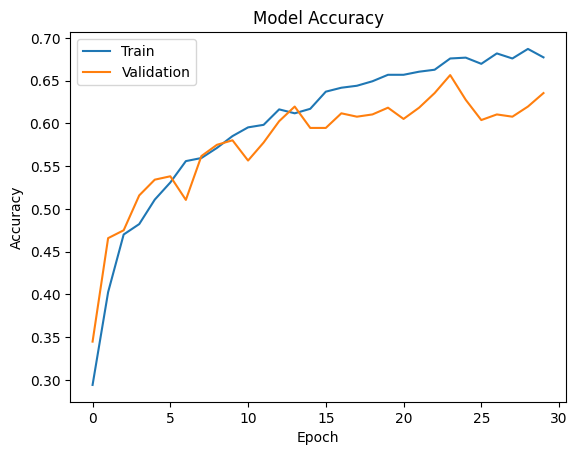

In [85]:
# let's plot accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- *The validation shows some oscillation on trainig and validation set.*

**Evaluate the model on test data**

*Let's take the accuracy metric right on test data closer to production data:*

In [86]:
accuracy = model_7.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # accuracy evaluation

30/30 - 0s - loss: 1.1868 - accuracy: 0.5895 - 436ms/epoch - 15ms/step


**Plotting the Confusion Matrix**

In [87]:
# Here we would get the output as probablities for each category for test sets
y_pred = model_7.predict(X_test_normalized)

30/30 [==============================] - 1s 13ms/step


In [88]:
# Obtaining the categorical values from y_pred_encoded
y_pred_arg = np.argmax(y_pred, axis=1)

In [89]:
# Obtaining the categorical values from y_test_encoded
y_test_arg = np.argmax(y_test_encoded, axis=1)

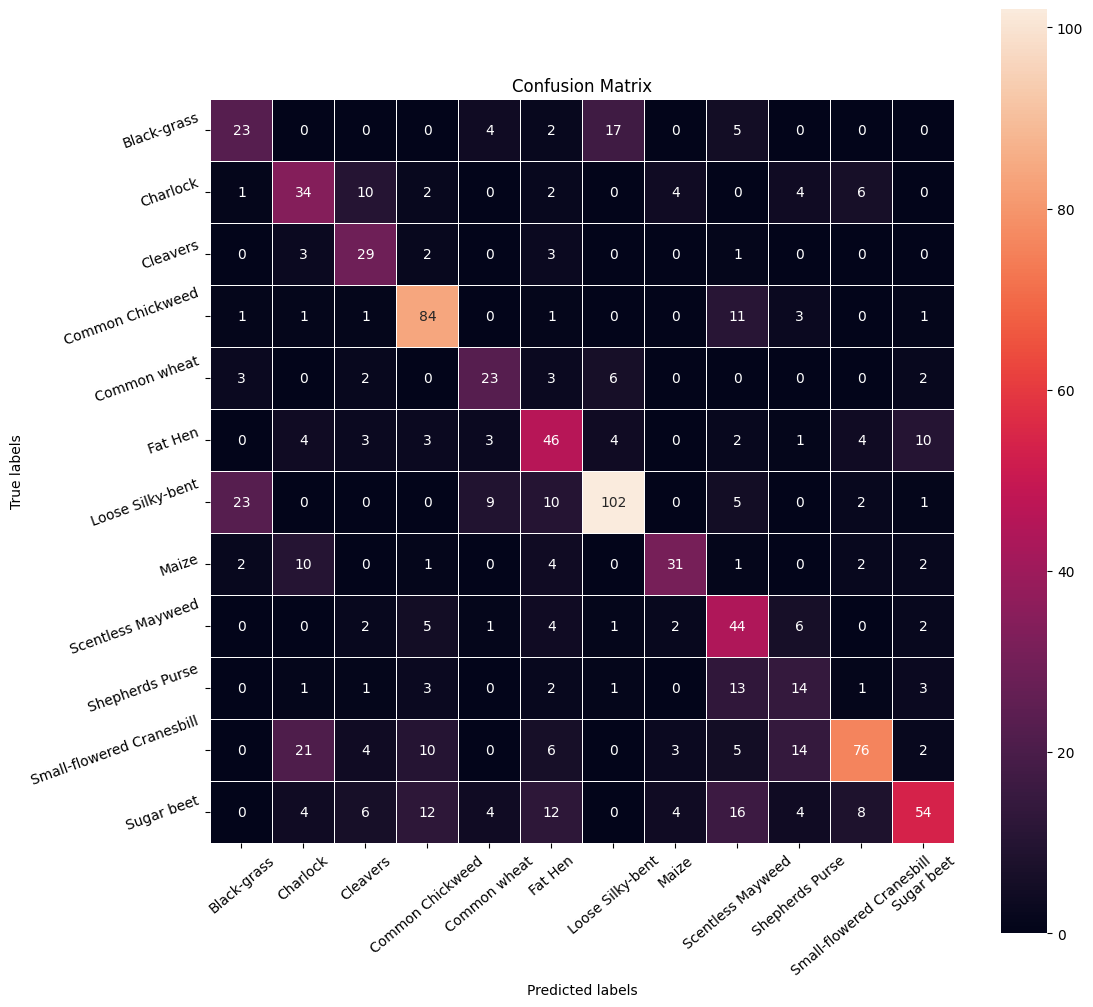

In [90]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_pred_arg, y_test_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

- *Charlock, Scentless Mayweed, Black-grass Loose Silky-bent have more wrong classifications from pretrained VGG16 imageNet with the augmented data.*

**Plotting Classification Report**

*Let's put metric result to the dataframes that store the accuracy values for the model:*

In [91]:
# naming model in the metric dataframe
model_name = "Model_7:Transfer&Learning&Augmented"
# Saving the result in train dataframe
metric_df.loc[model_name] = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred_arg) # converting the target variable y_test into its original form

In [92]:
# accuracy score report for test data
print("Test set:")
metric_df.loc[model_name]

Test set:


accuracy on test    0.589474
Name: Model_7:Transfer&Learning&Augmented, dtype: float64

## Final Model

**Let's retrieve metric dataframes :**

In [93]:
# retrieve the metric dataframe
print("Models performance comparison")
metric_df

Models performance comparison


,accuracy on test
Model_1:Plain,0.735789
Model_2:Plain&ReduceLROnPlateau,0.726316
Model_3:Batch&Dropout&ReduceLROnPlateau,0.690526
Model_4:Plain&ReduceLROnPlateau&Augmented,0.704211
Model_5:Batch&Dropout&ReduceLROnPlateau&Augmented,0.821053
Model_6:Transfer&Learning,0.614737
Model_7:Transfer&Learning&Augmented,0.589474


- **Model_5:Batch&Dropout&ReduceLROnPlateau&Augmented has better performance, so let's consider it as the best model.**

### Visualizing the prediction

**Let's define helper function for visualizing the predicted and correct label of images from test data and visualize prediction the best model:**

In [94]:
# let's define a custom plot function for visualizing predicted and real labels in a random way
def visualize(final_model, X_test_normalized, y_test_encoded):
  rows = 3
  cols = 4
  fig = plt.figure(figsize=(12, 10))
  for i in range(cols):
      for j in range(rows):
        idx = np.random.randint(0, X_test_normalized.shape[0])
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[idx])
        ax.text(0.5, 1.05, f'Predicted: {enc.inverse_transform(final_model.predict((X_test_normalized[idx].reshape(1,64,64,3)), verbose=0))}', ha='center', va='center', transform=ax.transAxes, fontsize=10)   # reshaping the input image as we are only trying to predict using a single image
        ax.text(0.5, -0.15, f'True Label: {enc.inverse_transform(y_test_encoded)[idx]}', ha='center', va='center', transform=ax.transAxes, fontsize=10)
  fig.tight_layout()
  plt.show()

Plotted labels: 


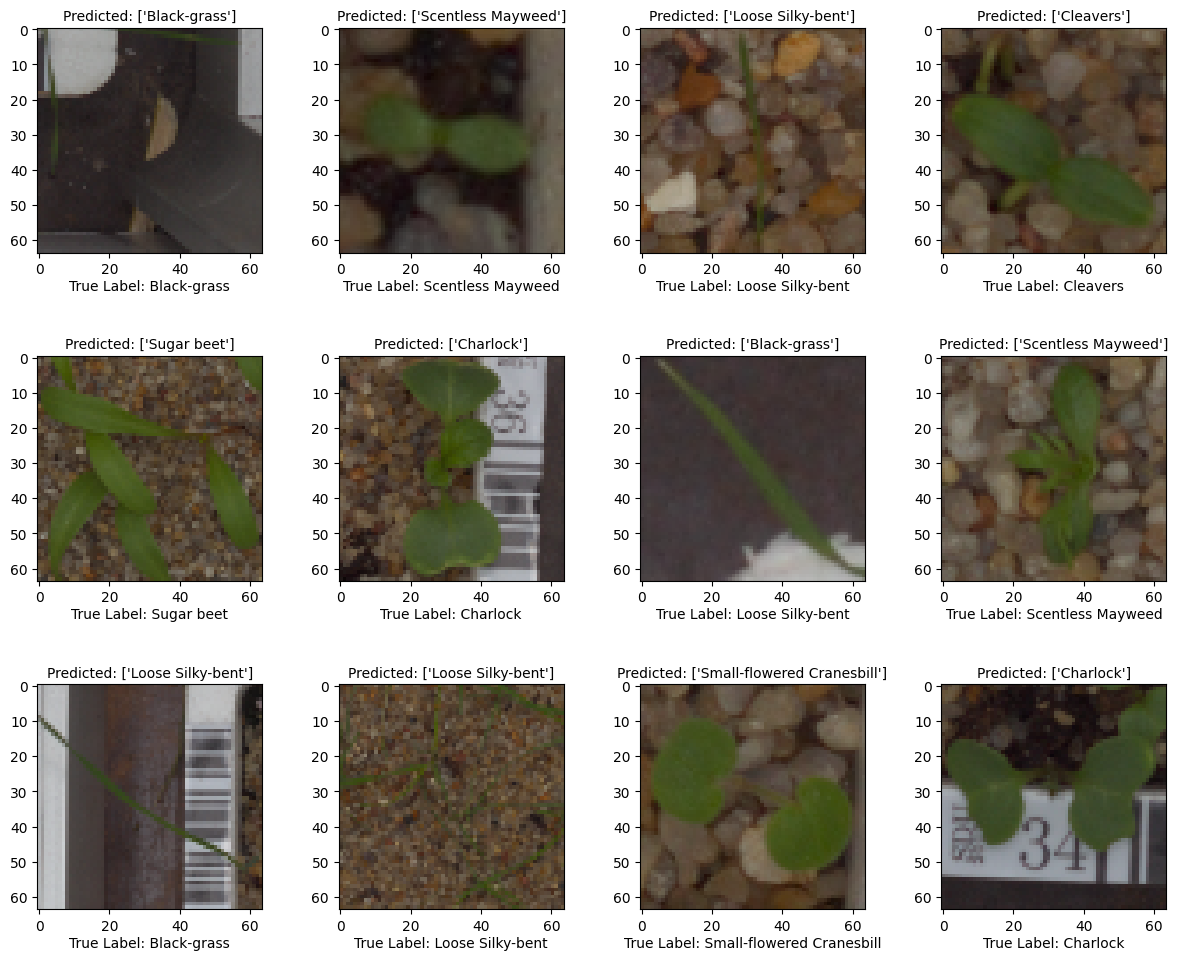

In [97]:
# let's print the random grid of labeled images
print("Plotted labels: ")
visualize(model_5 ,X_test_normalized, y_test_encoded)

## **Actionable Insights and Business Recommendations**

We have created a predictive model that can be used to determine the type of plant from an image.

Custom models give better perfomance than transfer learning models from VGG16 CNN.

The greatest mutual misclassification is caused by Black-grass and Loose silky-bent species.

Add distinctive features of the species Blackgrass and Loose silky-bent to increase the accuracy of classification.

Collect more labeled data for less represented species to make the data balanced.

**Business Tips:**

Develop a mobile application for farmers to identify plant species and control weeds.

Create an app for gardeners to identify plants and get care tips.

Collaborate with agricultural firms to integrate the classifier into precision agriculture tools.

Collaborate on plant monitoring and bioprojects.

Constantly update the classifier with new data and species.

*Export to HTML*

In [98]:
!jupyter nbconvert '/content/drive/MyDrive/Education/GreatLearning/Intro_to_CV/Project/CV_Project_Full_Code_Notebook.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Education/GreatLearning/Intro_to_CV/Project/CV_Project_Full_Code_Notebook.ipynb to html
[NbConvertApp] Writing 4286972 bytes to /content/drive/MyDrive/Education/GreatLearning/Intro_to_CV/Project/CV_Project_Full_Code_Notebook.html


_____